In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from wrangle import wrangle_zillow
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = wrangle_zillow()
df.head()

,bedrooms,bathrooms,sq_ft,tax_value,year_built,tax_amnt,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


In [3]:
train_validate, test = train_test_split(df, test_size=.2, random_state=99)
train, validate = train_test_split(train_validate, test_size=.3, random_state=99)
print(train.shape, validate.shape, test.shape)

(1172966, 7) (502700, 7) (418917, 7)


In [4]:
target = 'tax_value'
features = [col for col in df.columns if col != target]
quant_features = [feature for feature in features if df[feature].dtype != object]

In [5]:
def plot_variable_pairs(df):
    quant_features = [col for col in df.columns if df[col].dtype != object]
    feature_combos = list(itertools.combinations(quant_features, 2))
    for combo in feature_combos:
        sns.lmplot(x=combo[0], y=combo[1], data=df, line_kws={'color': 'red'})
        plt.show()

In [6]:
sample_train = train.sample(12000)
sample_train.head()

,bedrooms,bathrooms,sq_ft,tax_value,year_built,tax_amnt,fips
1172801,4,3.0,2447,344475,1976,3462.58,6059
731907,3,1.0,1614,541000,1954,6418.46,6059
891583,5,2.5,2476,125679,1968,1621.62,6059
1434226,3,2.0,1463,350285,1972,4822.78,6037
595351,3,2.0,2235,604694,1941,7304.33,6037


In [ ]:
plot_variable_pairs(sample_train)

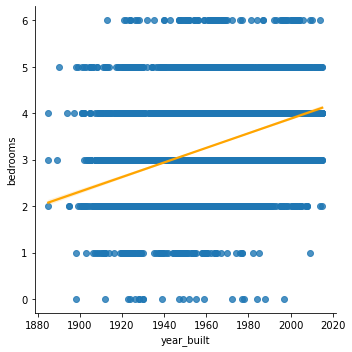

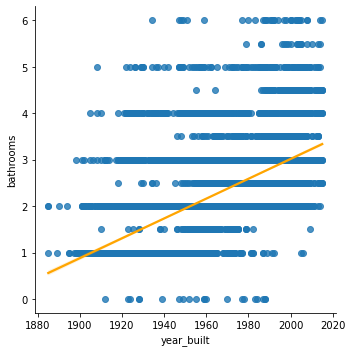

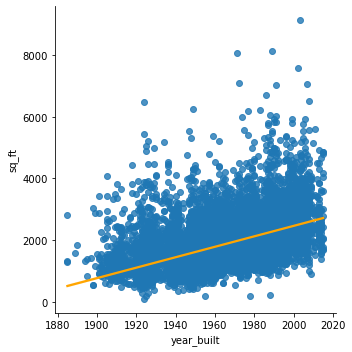

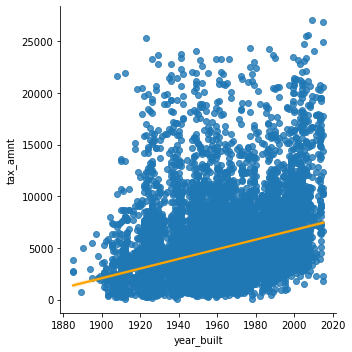

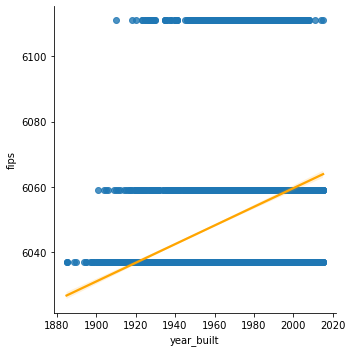

In [10]:
#feature changes over time
for features in quant_features:
    if features != 'year_built':
        sns.lmplot(x ='year_built', y = features, data = sample_train, line_kws={'color': 'orange'})
        plt.show()

In [11]:

    
categ_vars = [col for col in train.columns if (train[col].dtype == 'object') or (len(train[col].unique()) < 10)]
cont_vars = [col for col in train.columns if (col not in categ_vars)]


In [20]:
def plot_categorical_and_continuous_vars(df, categ_vars, cont_vars):    
    for cont_var in cont_vars:
        for categ_var in categ_vars:

            plt.figure(figsize=(30,10))
            
            # barplot of average values
            plt.subplot(131)
            sns.barplot(data=df,
                        x=categ_var,
                        y=cont_var)
            plt.axhline(train[cont_var].mean(), 
                        ls='--', 
                        color='black')
            plt.title(f'{cont_var} by {categ_var}', fontsize=14)
            
            # box plot of distributions
            plt.subplot(132)
            sns.boxplot(data=df,
                          x=categ_var,
                          y=cont_var)
            
            # swarmplot of distributions
            
            # for larger datasets, use a sample of n=1000
            if len(df) > 1000:
                train_sample = train.sample(1000)

                plt.subplot(133)
                sns.swarmplot(x=categ_var,
                              y=cont_var,
                              data=train_sample)
            
            # for smaller datasets, plot all data
            else:
                plt.subplot(133)
                sns.swarmplot(x=categ_var,
                              y=cont_var,
                              data=df)
            plt.show()

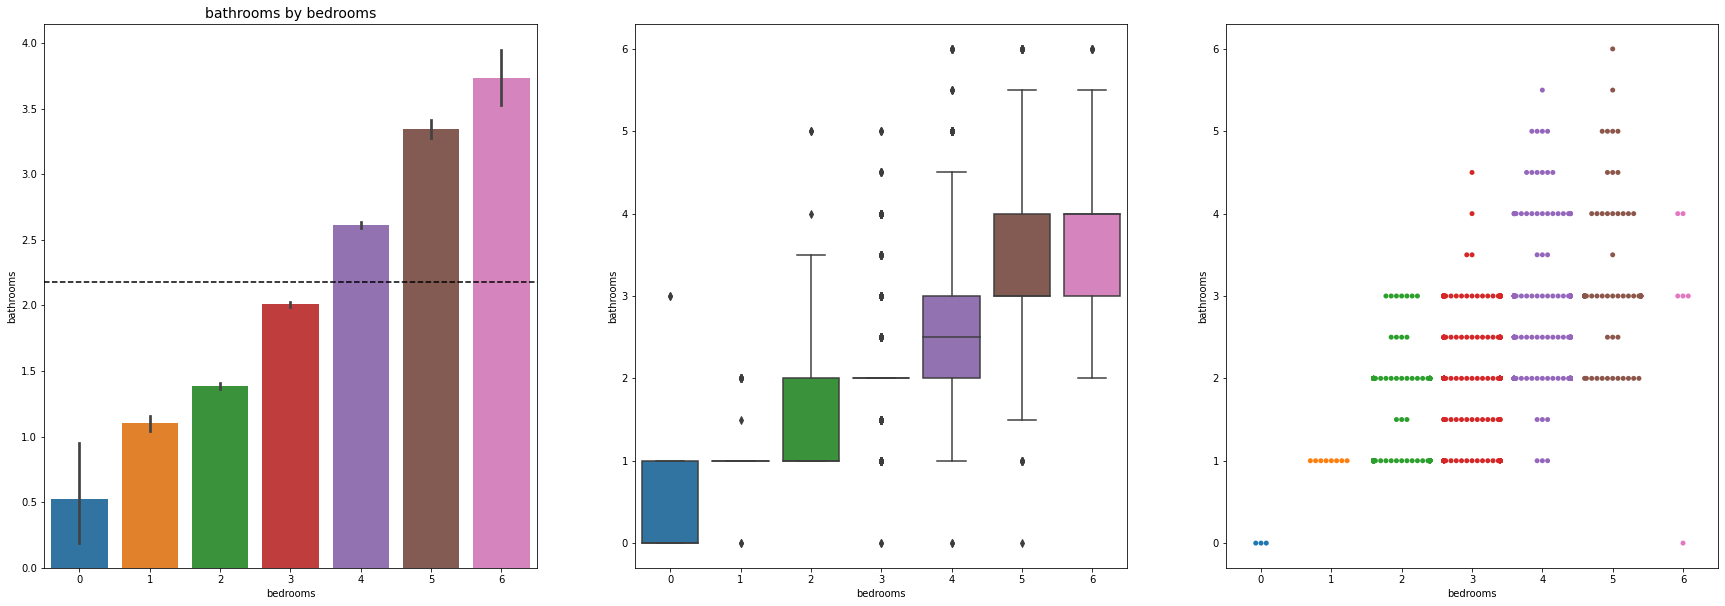

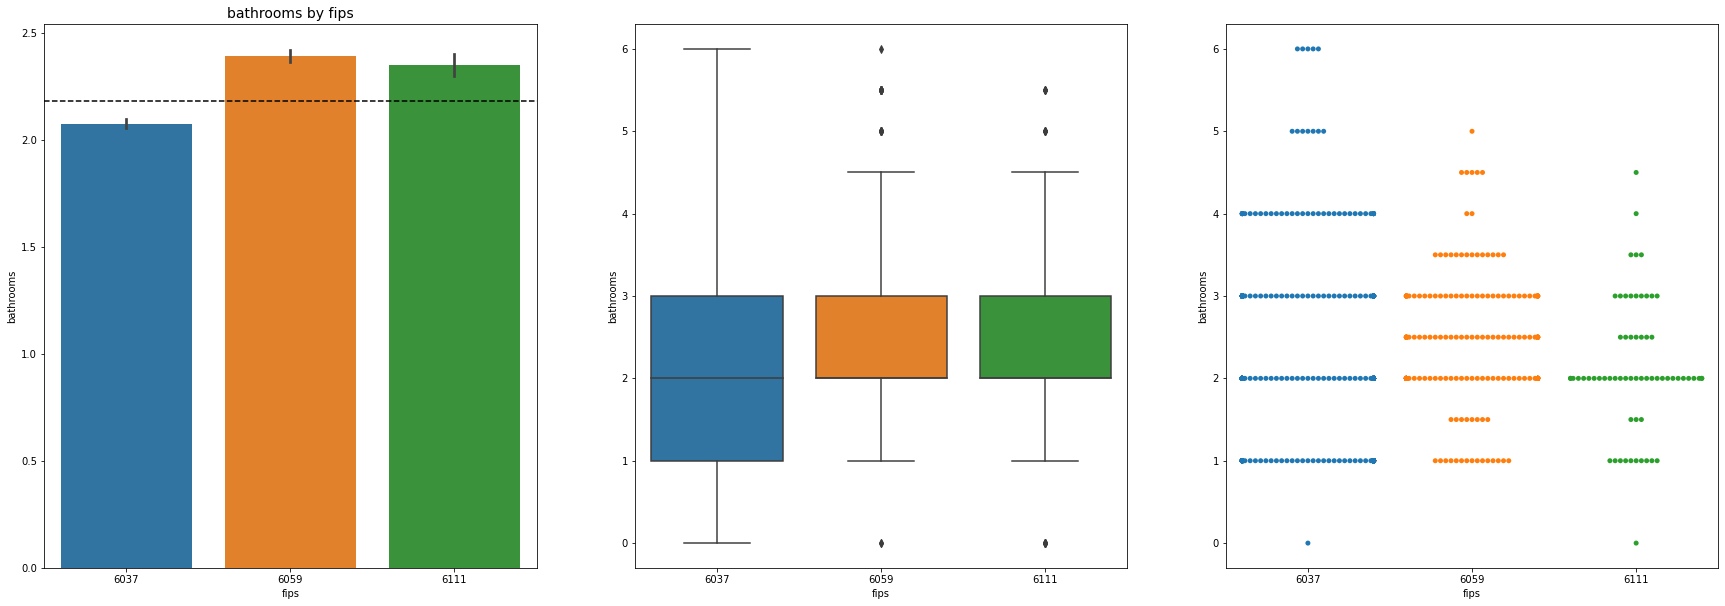

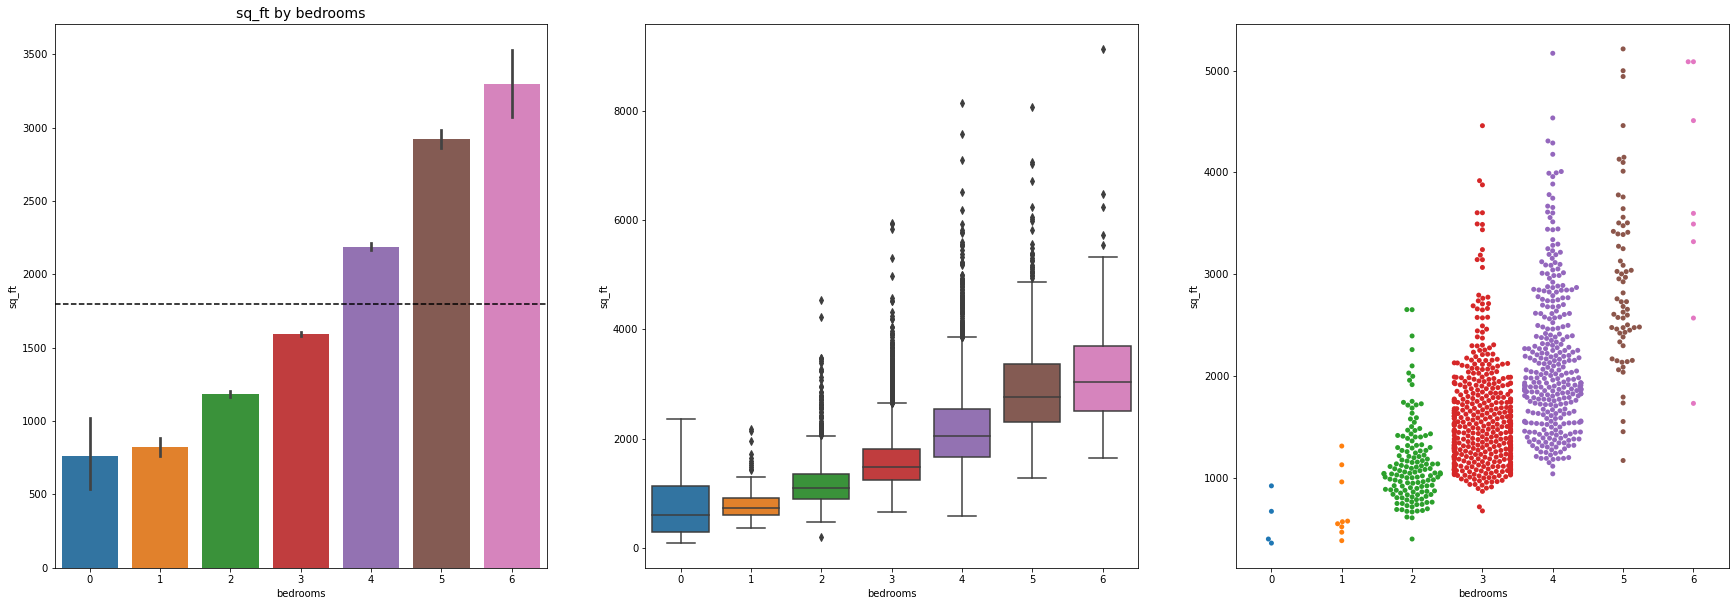

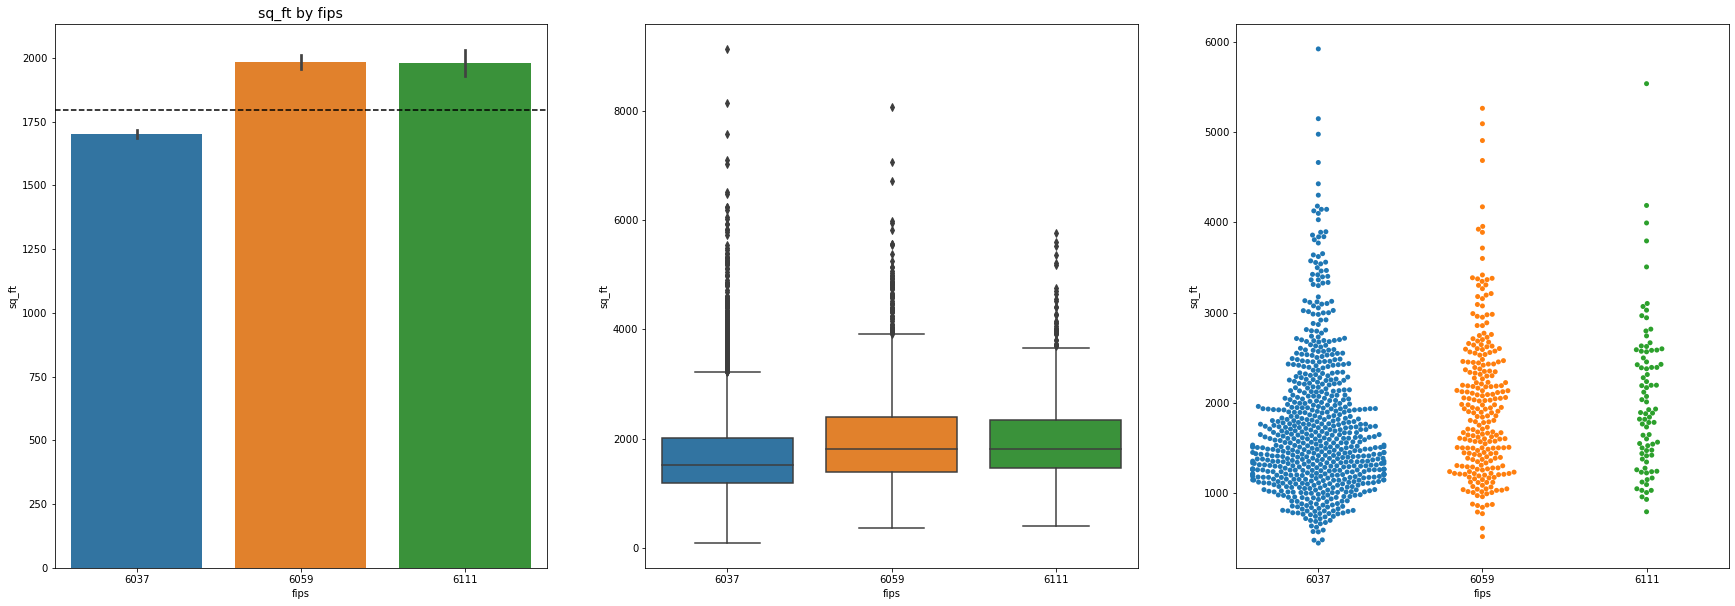

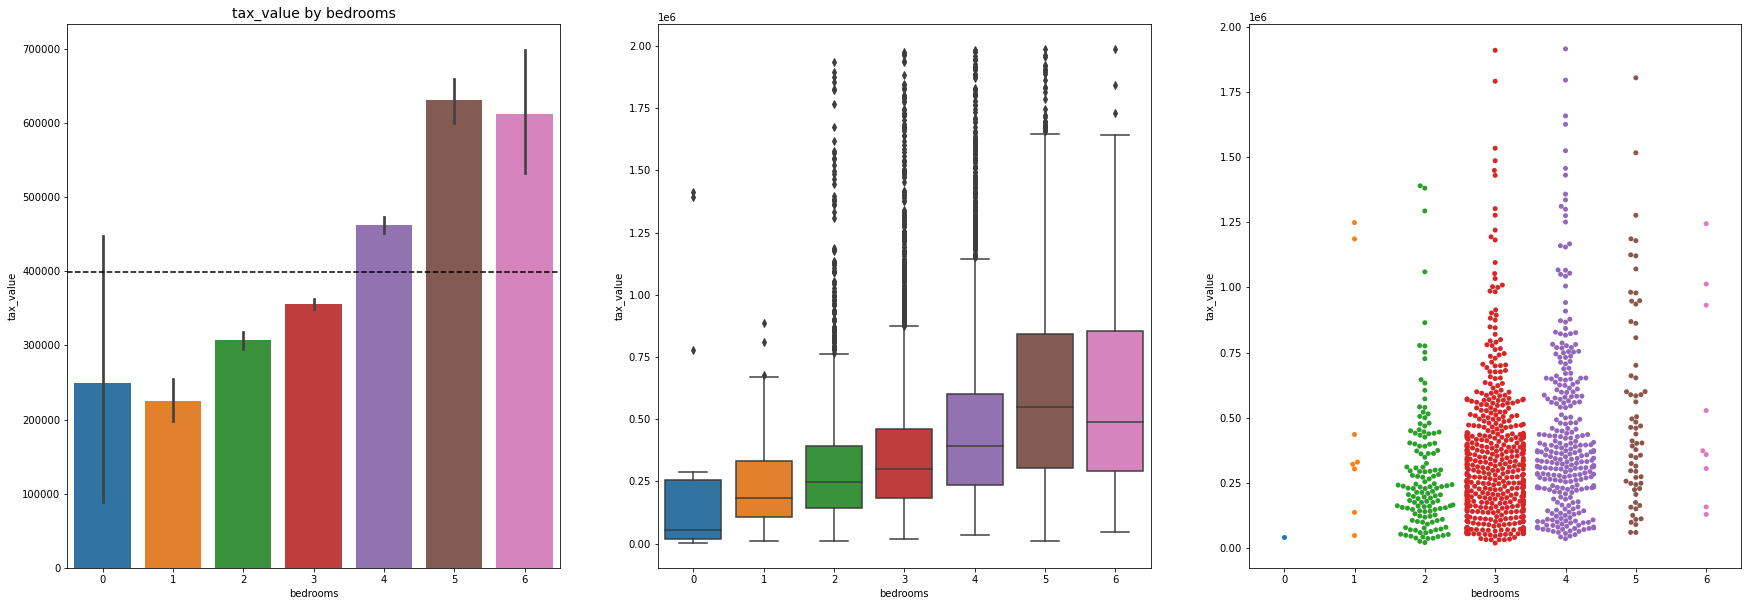

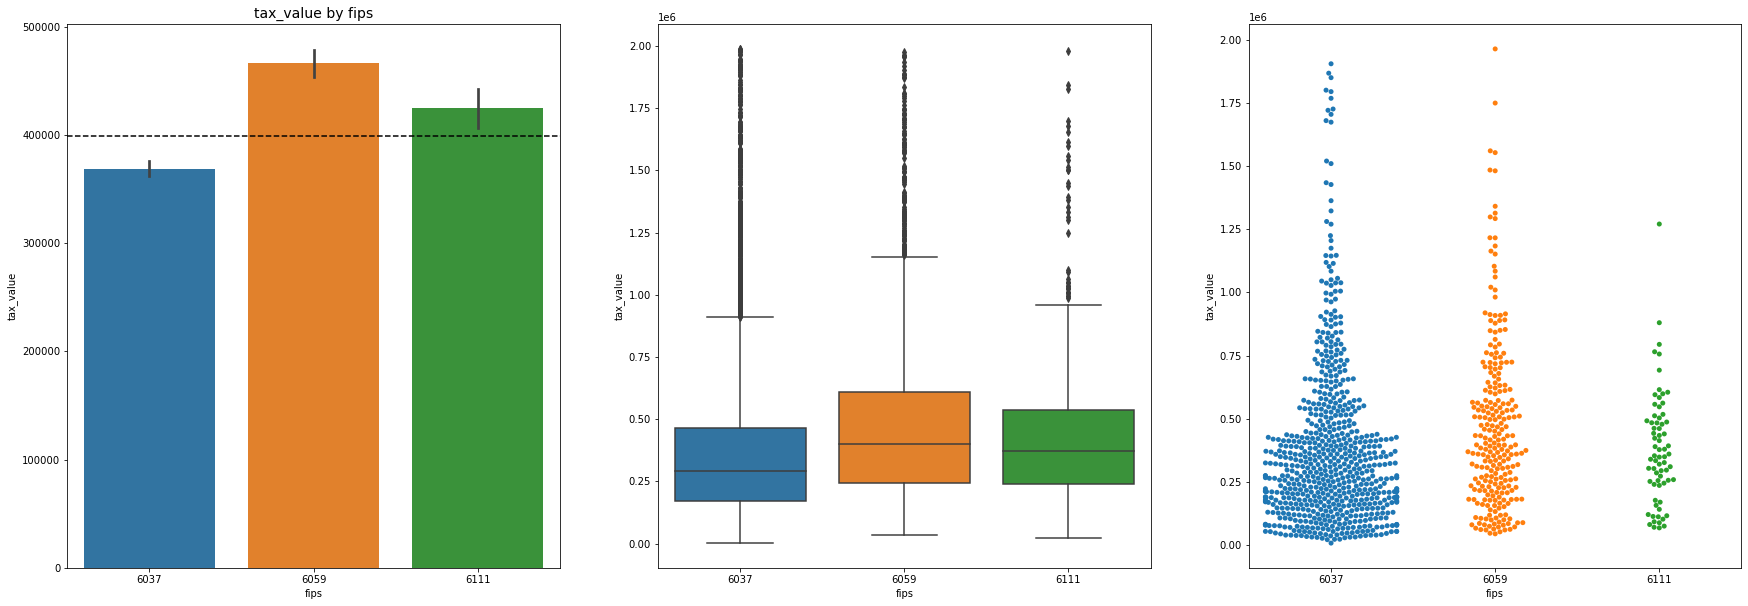

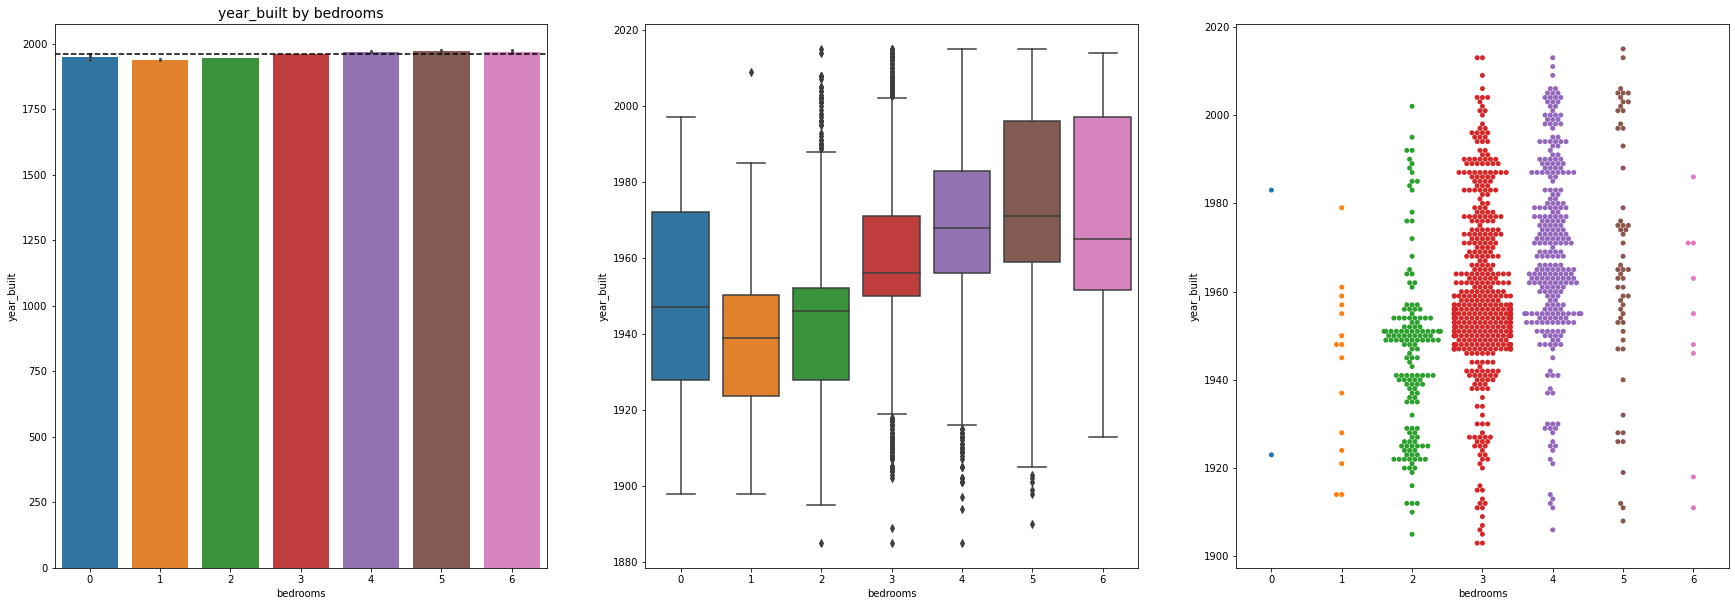

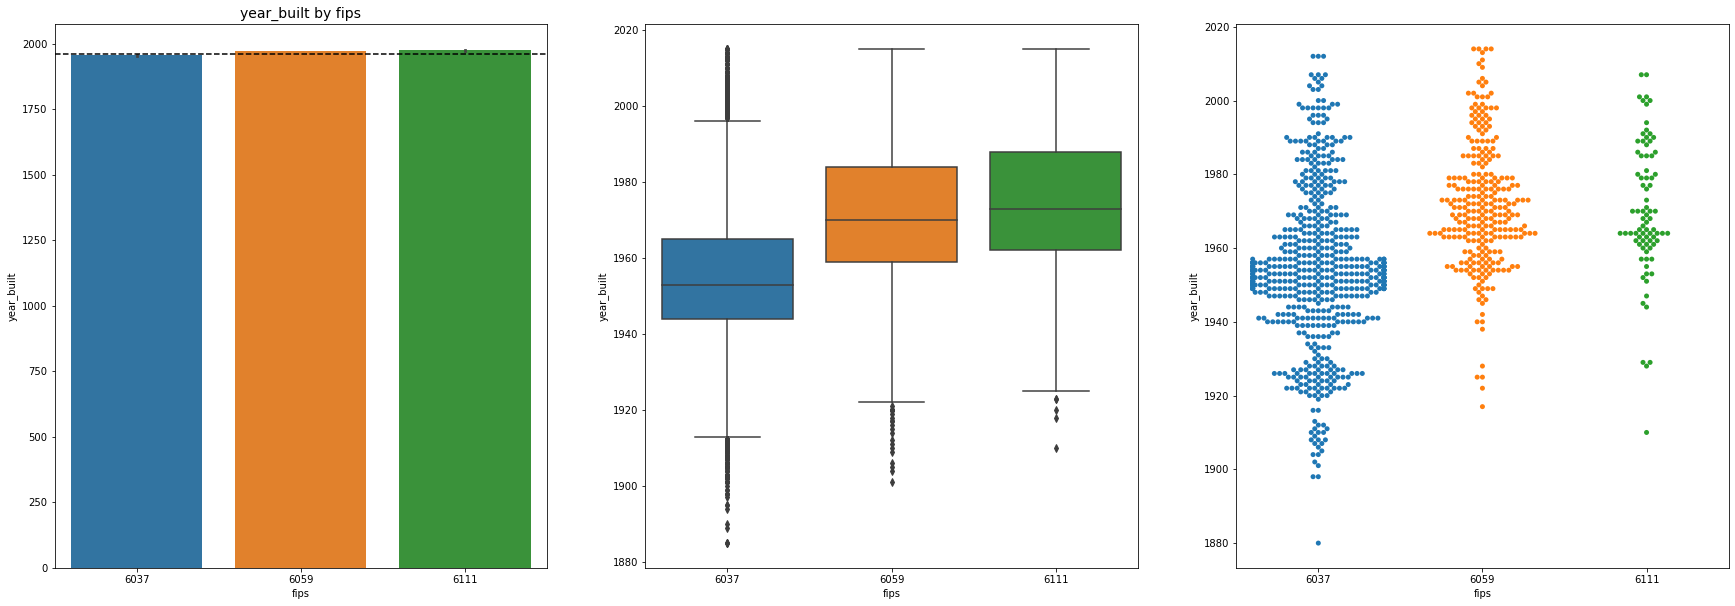

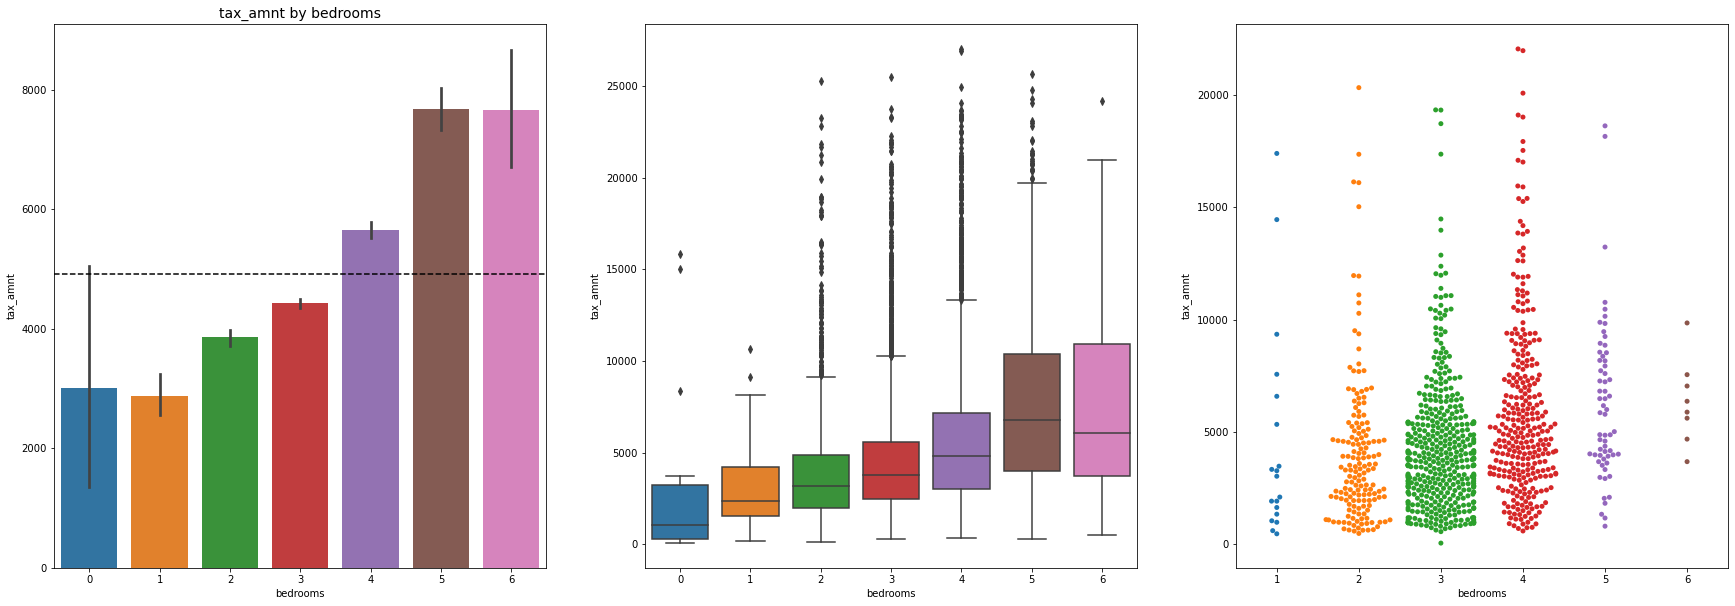

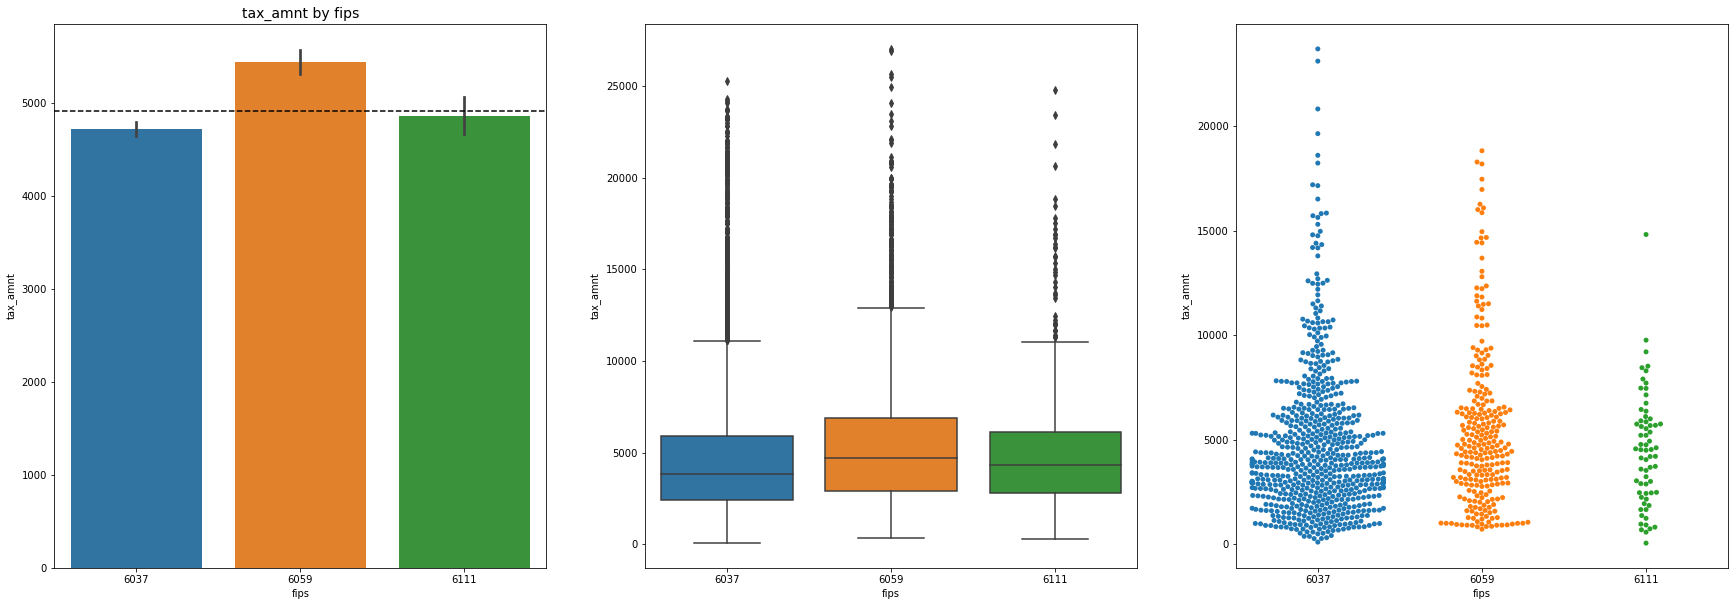

In [21]:
plot_categorical_and_continuous_vars(sample_train, categ_vars, cont_vars)

In [ ]:
plot_categorical_and_continuous_vars(sample_train, categorical=categorical, continuous=continuous)